<a href="https://colab.research.google.com/github/tamaravera14/INVESTIGACION_DE_OPERACIONES/blob/main/Tablero_colores_Cadenas_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Tablero de colores***

---

Bazaldua Vera Tamara Alheli

---

## **PROBABILIDAD TOTAL**

## Simulación de lanzamiento de dos monedas
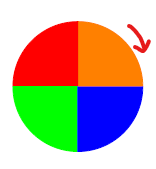
*Supongamos que tenemos en un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento….*

**¿Son todos los sectores igual de probables cuando pase mucho tiempo?**

***Solución Analítica.***

# **Descripción del experimento**

La **variable de estado** es la posición de la ficha:**verde, naranja, azul, rojo.**

Las posibles salidas de las monedas son:

$CC, CX, XC, XX \Rightarrow$ todas con probabilidad  $\frac{1}{4}$


Denotamos:

* $x_n$: probabilidad del sector naranja tras $n$ lanzamientos.
* $y_n$: probabilidad del sector azul tras $n$ lanzamientos.
* $z_n$: probabilidad del sector verde tras $n$ lanzamientos.
* $t_n$: probabilidad del sector rojo tras $n$ lanzamientos.

## **Cálculo de probabilidades usando el Teorema de la Probabilidad Total**

### Ecuaciones de transición basadas en el teorema de la probabilidad total $(n=1)$

1. $x_1:$ probabilidad de estar en naranja tras un paso
   * $x_1 = \frac{1}{4}x_0 + 0 \cdot y_0 + \frac{1}{4}z_0 + \frac{1}{2}t_0$

2. $y_1:$ probabilidad de estar en azul tras un paso
  * $y_1 = \frac{1}{2}x_0 + \frac{1}{4}y_0 + 0 \cdot z_0 + \frac{1}{4}t_0$

3. $z_1:$ probabilidad de estar en verde tras un paso
  * $z_1 = \frac{1}{4}x_0 + \frac{1}{2}y_0 +\frac{1}{4}z_0 + 0 \cdot t_0$

4. $t_1:$ probabilidad de estar en rojo tras un paso
  * $t_1 = 0 \cdot x_0 + \frac{1}{4}y_0 + \frac{1}{2}z_0 + \frac{1}{4}t_0$


**Nota:**
Estas expresiones surgen al aplicar el Teorema de la Probabilidad Total:

$
P(A) = P(A \mid B_1)P(B_1) + P(A \mid B_2)P(B_2) + \dots + P(A \mid B_n)P(B_n)
$



## ***Modelo de Transición Estocástico***

Análogamente para $( n = 2 )$ se continúa el proceso utilizando los valores obtenidos de $( x_1, y_1, z_1, t_1 )$

En general, el sistema de probabilidades se expresa matricialmente como:

$$
\begin{pmatrix}
x_n \\
y_n \\
z_n \\
t_n
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
x_{n-1} \\
y_{n-1} \\
z_{n-1} \\
t_{n-1}
\end{pmatrix}
$$

Denotando:

$$
\mathbf{x}_n = A \mathbf{x}_{n-1}
\quad \Rightarrow \quad
\mathbf{x}_n = A^n \mathbf{x}_0
$$

Para resolver el problema debemos calcular $( A^n ).$

---

# ***Solución Analítica:***

---

### ***Problema:***

Supongamos que tenemos un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Queremos saber:

$$\textit{¿Son todos los sectores igual de probables cuando pase mucho tiempo?}$$

**Matriz de transición**

$$
A =
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
$$

**Distribución estacionaria**

Buscamos la solución al sistema:

$$
\begin{cases}
x_n = \frac{1}{4}x_n + \frac{1}{2}y_n + \frac{1}{4}z_n \\
y_n = \frac{1}{4}y_n + \frac{1}{2}z_n + \frac{1}{4}t_n \\
z_n = \frac{1}{4}x_n + \frac{1}{4}z_n + \frac{1}{2}t_n \\
t_n = \frac{1}{2}x_n + \frac{1}{4}y_n + \frac{1}{4}t_n \\
x_n + y_n + z_n + t_n = 1
\end{cases}
$$

**Solución:**

Resolviendo el sistema anterior, se obtiene:

$$
x_n = y_n = z_n = t_n = \frac{1}{4}
$$

Todos los sectores son igual de probables cuando pasa mucho tiempo:

$$
\boxed{
x_n = y_n = z_n = t_n = \frac{1}{4}
}
$$

---

# ***Solución:***

---

In [4]:
import matplotlib.pyplot as plt
import numpy as np

**Función matriz_recursion(A,n)**

Realiza la multiplicación de una matriz por sí misma repetidamente, es decir, calcula la matriz $A_n$ utilizando recursión.

**Objetivo**

Multiplicar n veces la matriz A, para obtener la matriz de recursión para estimar los valores de $x_n,y_n,z_n,t_n$.

**Simbología**

* n := Potencia a la cual elevaremos la matriz de transición.
* A := Matriz de transición.

In [36]:
# Multiplicar matriz a la n potencia
def matriz_recursion(A, n):
    if A.shape[0] != A.shape[1]:    # Compara las dimensiones de la matriz para verificar que sea una matriz cuadrada y pueda hacer la multiplicacion
        raise ValueError("La matriz debe ser cuadrada")
    if n < 0:   # Verifica que sea una potencia positiva
        raise ValueError("El exponente n debe ser un número no negativo")

    result = np.eye(A.shape[0])  # Empezar con la matriz identidad
    for _ in range(n):
        result = np.dot(result, A)
    return result

# Definimos la matriz A
A = np.array([
 [1/4, 0, 1/4, 2/4],
 [2/4, 1/4, 0, 1/4],
 [1/4, 2/4, 1/4, 0],
 [0, 1/4, 2/4, 1/4]
 ])

# Multiplicamos A a la n-ésima potencia
mat_rec = matriz_recursion(A, 30)
print(mat_rec)


[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


**Función mostrar_probabilidades(A, estado_inicial, n)**

Almacenan las probabilidades de cada uno de los estados $(x, y, z, t)$ en cada iteración. Se empieza con valores iniciales $[1,0,0,0]$, lo que indica que al principio todo el sistema está en el estado $x_0$, tomando el primer eigenvector

En cada iteración, se calculan las nuevas probabilidades para cada estado a partir de los valores anteriores. Cada nuevo valor se obtiene aplicando los coeficientes de la matriz de transición a los valores anteriores de $(x_i, y_i, z_i, t_i)$.

Estas ecuaciones corresponden a una multiplicación de la matriz de transición con el vector de estado en el instante $n-1$.

$(x, y, z, t)$ contendrán los valores de las probabilidades de cada estado en cada paso del proceso de transición.

In [38]:
def mostrar_probabilidades(A, estado_inicial, n):
    # Imprimir encabezado de la tabla
    print("Periodo   |   x     |    y    |    z    |   t    ")
    print("----------|---------|---------|---------|--------")

    # Mostrar el estado inicial (periodo 0)
    estado = estado_inicial
    print(f"{0:<9} | {estado[0]:.4f}  | {estado[1]:.4f}  | {estado[2]:.4f}  | {estado[3]:.4f}")

    x=[]
    y=[]
    z=[]
    t=[]
    # Cálculo de las probabilidades en cada iteración y mostrar en la tabla
    for i in range(1, n + 1):
        estado = np.dot(A, estado)
        print(f"{i:<9} | {estado[0]:.4f}  | {estado[1]:.4f}  | {estado[2]:.4f}  | {estado[3]:.4f}")

        x.append(estado[0])
        y.append(estado[1])
        z.append(estado[2])
        t.append(estado[3])

    return x,y,z,t

# Definir el estado inicial
estado_inicial = np.array([1, 0, 0, 0])

# Número de iteraciones
n = 30

# Llamar a la función
x,y,z,t = mostrar_probabilidades(A, estado_inicial, n)

Periodo   |   x     |    y    |    z    |   t    
----------|---------|---------|---------|--------
0         | 1.0000  | 0.0000  | 0.0000  | 0.0000
1         | 0.2500  | 0.5000  | 0.2500  | 0.0000
2         | 0.1250  | 0.2500  | 0.3750  | 0.2500
3         | 0.2500  | 0.1875  | 0.2500  | 0.3125
4         | 0.2812  | 0.2500  | 0.2188  | 0.2500
5         | 0.2500  | 0.2656  | 0.2500  | 0.2344
6         | 0.2422  | 0.2500  | 0.2578  | 0.2500
7         | 0.2500  | 0.2461  | 0.2500  | 0.2539
8         | 0.2520  | 0.2500  | 0.2480  | 0.2500
9         | 0.2500  | 0.2510  | 0.2500  | 0.2490
10        | 0.2495  | 0.2500  | 0.2505  | 0.2500
11        | 0.2500  | 0.2498  | 0.2500  | 0.2502
12        | 0.2501  | 0.2500  | 0.2499  | 0.2500
13        | 0.2500  | 0.2501  | 0.2500  | 0.2499
14        | 0.2500  | 0.2500  | 0.2500  | 0.2500
15        | 0.2500  | 0.2500  | 0.2500  | 0.2500
16        | 0.2500  | 0.2500  | 0.2500  | 0.2500
17        | 0.2500  | 0.2500  | 0.2500  | 0.2500
18        | 0.2500

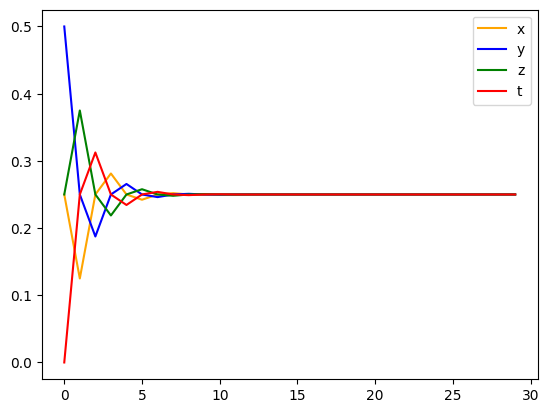

In [35]:
#Mostrar resultados
plt.plot(x, label='x', color="orange")
plt.plot(y, label='y', color="blue")
plt.plot(z, label='z', color="green")
plt.plot(t, label='t', color="red")
plt.legend()
plt.show()

Todos los sectores son igual de probables cuando pasa mucho tiempo:

$$
\boxed{
x_n ≈ y_n ≈ z_n ≈ t_n ≈ \frac{1}{4}
}
$$